In [0]:
# import libraries
# load digits data sets from sklearn library

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
%matplotlib inline



In [0]:
# load digits data set
digits = load_digits()

# print size of the data set
# digits.data.shape - output - array[number of rows, number of columns]
print("Digits data set array size", digits.data.shape) 
print("Digits target size", digits.target.shape)


Digits data set array size (1797, 64)
Digits target size (1797,)


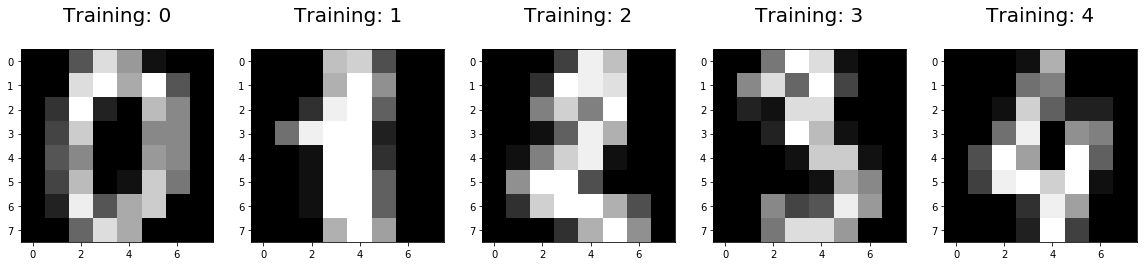

In [0]:
# print sample images
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1,5,index+1)
  plt.imshow(np.reshape(image, (8,8)),cmap=plt.cm.gray)
  plt.title('Training: %i\n' %label, fontsize=20)

In [0]:
# split training and test data
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

# print train and test array size
print("Train data size", X_train.shape)
print("Test data size", X_test.shape)
print("Train label size", y_train.shape)
print("Test label size", y_test.shape)


Train data size (1383, 64)
Test data size (414, 64)
Train label size (1383,)
Test label size (414,)


In [0]:
# train model using Logistic regression algorithm
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# predict 1 test
print(regressor.predict(X_test[0].reshape(1,-1)))
# predict 10 in the test data set
print(regressor.predict(X_test[0:10]))
print(regressor.score(X_test[0:10], y_test[0:10]))

# predict the whole data set
predictions=regressor.predict(X_test)
score = regressor.score(X_test, y_test)


[4]
[4 0 9 1 8 7 1 5 1 6]
0.9


In [0]:
# check accuracy with confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix", cm)

Confusion Matrix [[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


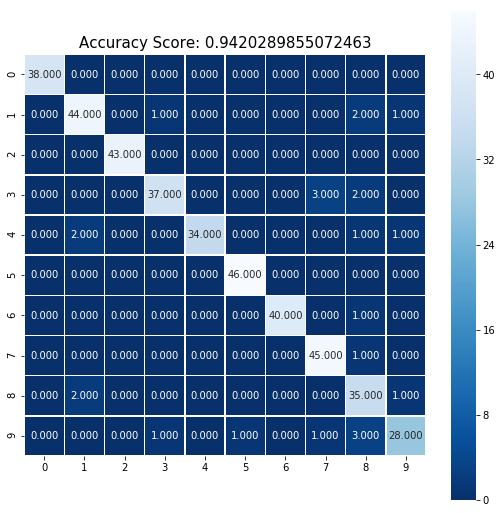

In [0]:
# Visualize confusion matrix using a heatmap

plt.figure(figsize=(9,9))
plt.ylabel("Actual digit")
plt.xlabel("Predicted digit")
sample_title = "Accuracy Score: {0}".format(score)
plt.title(sample_title, size=15)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Blues_r")


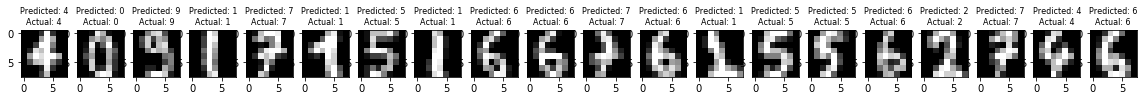

In [0]:
# Checking individual predictions

index=0
classifiedIndex=[]
for predict,actual in zip(predictions, y_test):
  if predict==actual:
    classifiedIndex.append(index)
  index +=1

plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:20]):
  plt.subplot(1,20, plotIndex +1)
  plt.imshow(np.reshape(X_test[wrong], (8,8)),cmap=plt.cm.gray)
  plt.title("Predicted: {}\nActual: {}".format(predictions[wrong], y_test[wrong]), fontsize=8)